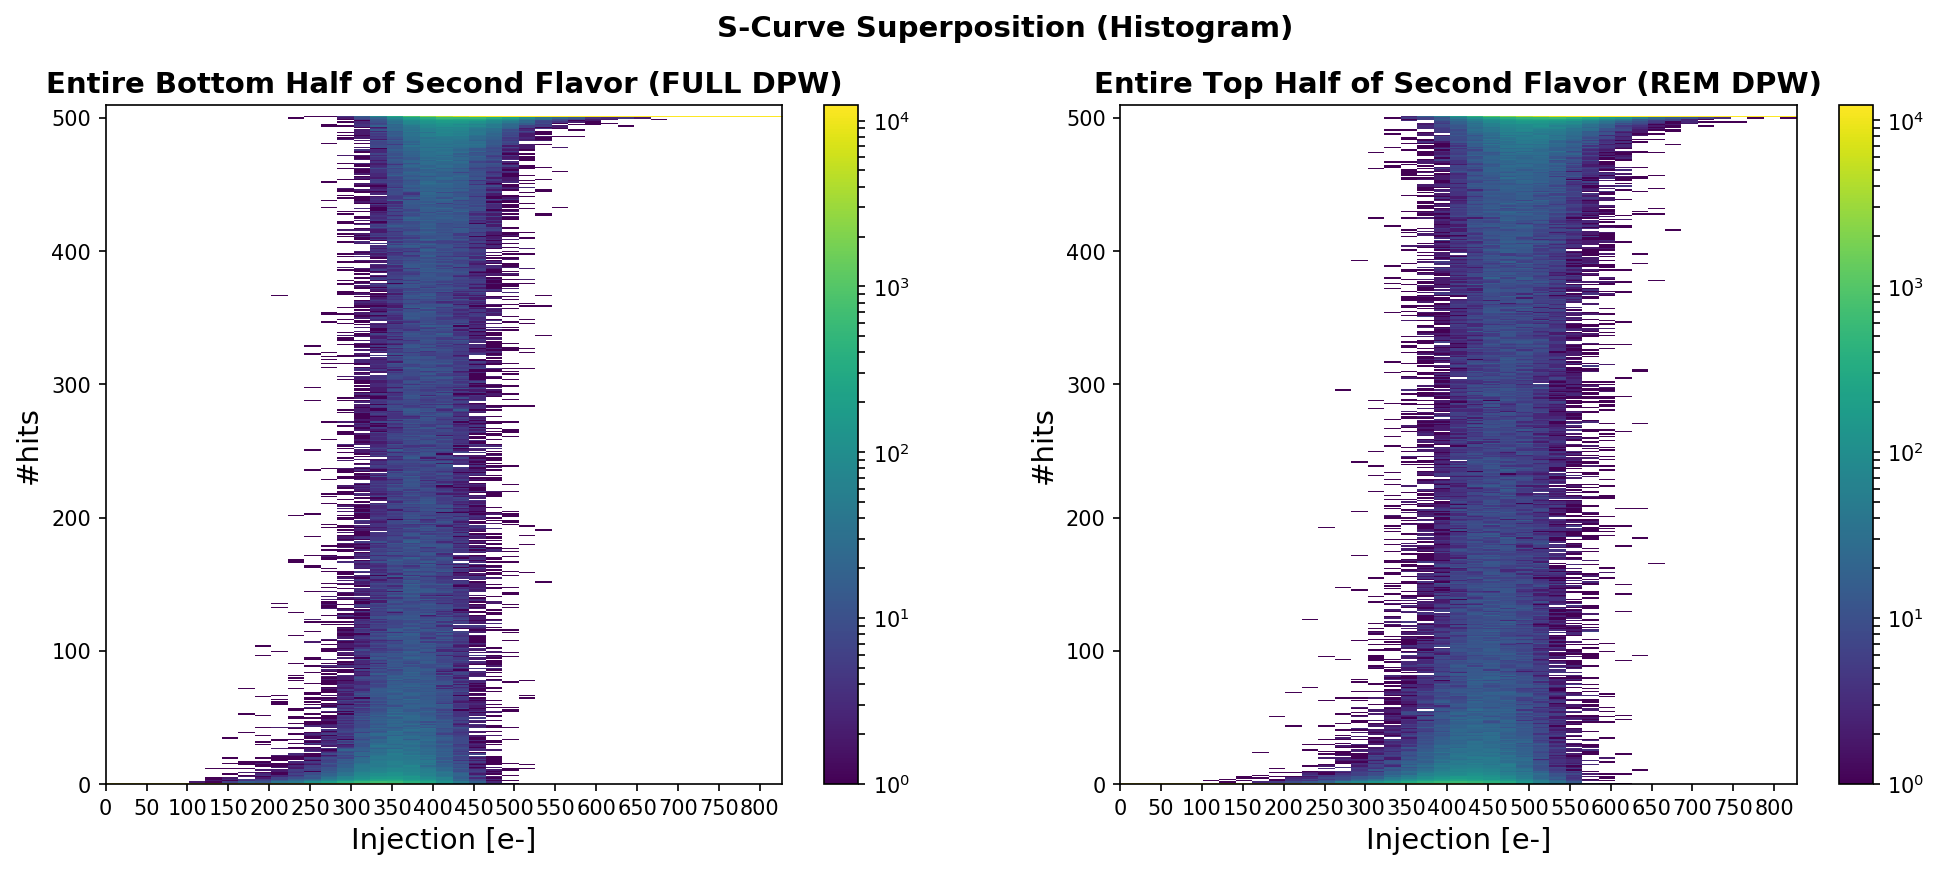

In [1]:
%reset -f
%matplotlib inline
from tjmonopix.analysis.plotting import plotting
plot=plotting()

start_dif=0
VHLrange=40
max_occ = 500
DUtoe=20.18
threshold=350
sigma=14
folder='PMOS_PW3_PS6'

plot.plot_scurve_histogram(max_occ+10, DUtoe, 50, 16, 6, 150, folder)

In [ ]:
plot.fit_scurvedata(VHLrange, start_dif, max_occ, DUtoe, threshold, sigma, folder)

In [ ]:
figx=25
figy=8
dpi=100
autoscale=False
samescale=False
rangelowbot=200
rangehighbot=700
resolutionbot=200
rangelowtop=100
rangehightop=700
resolutiontop=200
ytickauto=False
ytickhigh=261
ytickspacing=20
xtickauto=False
xticklow = 200
xtickhigh=700
xtickspacing=50

plot.plot_thr_dispersion(figx, figy, dpi, autoscale, samescale, rangelowbot, rangehighbot, resolutionbot, rangelowtop, rangehightop, resolutiontop, ytickauto, ytickhigh, ytickspacing, xtickauto, xticklow, xtickhigh, xtickspacing, folder)

In [ ]:
figx=25
figy=8
dpi=100
autoscale=False
samescale=False
rangelowbot=5
rangehighbot=35
resolutionbot=900
rangelowtop=5
rangehightop=35
resolutiontop=900
ytickauto=False
ytickhigh=551
ytickspacing=50
xtickauto=False
xticklow = 5
xtickhigh=41
xtickspacing=5

plot.plot_enc_dispersion(figx, figy, dpi, autoscale, samescale, rangelowbot, rangehighbot, resolutionbot, rangelowtop, rangehightop, resolutiontop, ytickauto, ytickhigh, ytickspacing, xtickauto, xticklow, xtickhigh, xtickspacing, folder)

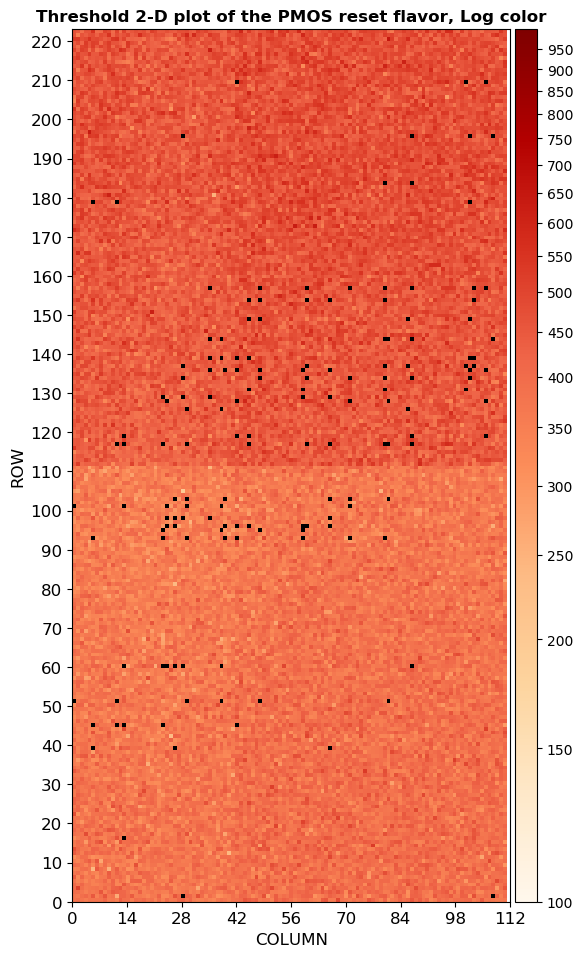

In [26]:
thresholdorenc='threshold'
colm='OrRd'
figx=6
figy=12
dpi=100
vauto=False
Log=True
vmin=100
vmax=1000
cbtickauto=True
cbtickmin=100
cbtickmax=700
cbtickspacing=50
mint1=2
mint2=1
flavor='PMOS reset'

plot.dplot(folder, thresholdorenc, figx, figy, dpi, colm, vauto, Log, vmin, vmax, cbtickauto, cbtickmin, cbtickmax, cbtickspacing, mint1, mint2, flavor)

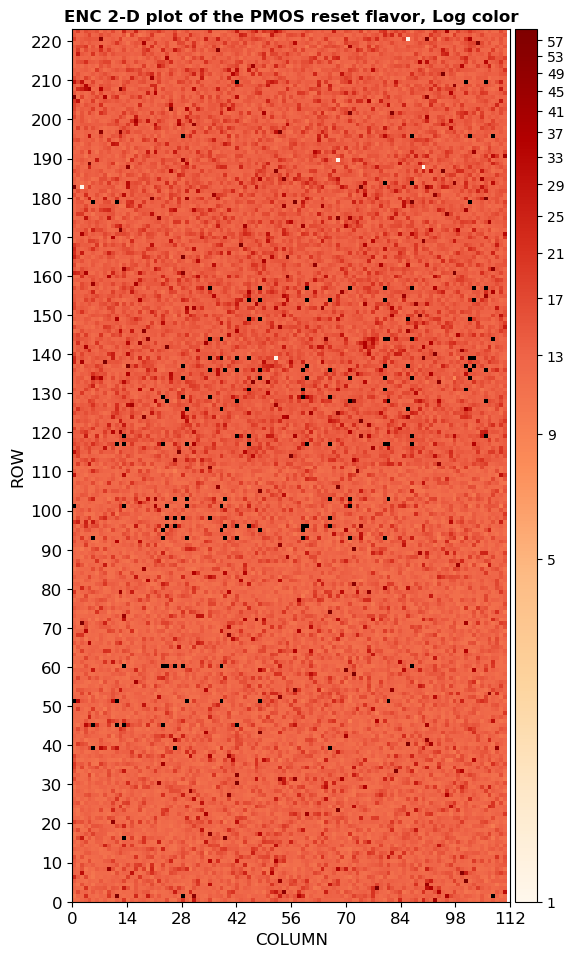

In [38]:
thresholdorenc='enc'
colm='OrRd'
figx=6
figy=12
dpi=100
vauto=False
Log=True
vmin=1
vmax=60
cbtickauto=True
cbtickmin=1
cbtickmax=60
cbtickspacing=4
mint1=2
mint2=2
flavor='PMOS reset'

plot.dplot(folder, thresholdorenc, figx, figy, dpi, colm, vauto, Log, vmin, vmax, cbtickauto, cbtickmin, cbtickmax, cbtickspacing, mint1, mint2, flavor)

In [ ]:
import numpy as np
enctop = np.load('./'+folder+'/enctop.npy')
encbot = np.load('./'+folder+'/enctop.npy')
#ee=np.where((enc > 1)&(enc < 3))[0]
maskedbot=np.where(encbot==0)[0]
maskedtop=np.where(encbot==0)[0]
#print ee
masked = len(maskedbot)+len(maskedtop)
print masked

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

xhits = range(start_dif,VHLrange+start_dif+1)

scurves = np.load('./'+folder+'/scurvedatatop.npy')
scurves[:,0]=0
scurves[:,1]=0
pix=11063
print scurves[pix,:]
popt, _ = curve_fit(plot.scurve, xhits, scurves[pix,:], p0=[max_occ, threshold, sigma], check_finite=False)
print popt
pt=plt.plot(scurves[pix,:], 'ro')

In [ ]:
index=3829
col = index // 112
row = index-col*112
row2 = (index-col*112)+112
print col
print row
print row2

In [ ]:
import numpy as np
cbticks=np.arange(100, 500, 50)
print cbticks
cbticks=np.logspace(1, 2, 5)
print cbticks